# Testing the helicity from obs calculation

In [1]:
import os, sys
sys.path.append('../')

import numpy as np
import astropy.units as u
import astropy.constants as c
import matplotlib.pyplot as plt
import imagine as img
import shell.visualization as visu


We will use a common grid for all the calculations

In [33]:
L = 70*u.pc; N = 300

grid = img.UniformGrid(# coordinate values for edges of the grid box
                       box=[[-L,L],[-L,L],[-L,L]], 
                       # Grid resolution
                       resolution=[N, N, N])

The naive random field previously defined in notebook 4 is copied here, with some adjustments

Now, I will define a helper class which contains the full specficiation of the model and stores the relevant quantities during one particular evaluation. This is done in a very inefficient fashion, as clarity is the main goal.

In [34]:
import model_helper as helper

Observables (e.g. Q) appear in lists (one item per input frequency) while physical quantities (e.g. Bx) not. 
Note that the RM property is computed combining 2 consecutive wavelengths. Thus , it contains less elements than, say, stokes Q. 

Let us test this

In [35]:
freqs = [(3*u.cm).to(u.GHz, equivalencies=u.spectral()), 
         (6*u.cm).to(u.GHz, equivalencies=u.spectral())]
freqs

[<Quantity 9.99308193 GHz>, <Quantity 4.99654097 GHz>]

In [36]:
muG = u.microgauss

uniform_model = helper.Model(grid, B=[1, 0, 0]*muG, freqs=freqs,
                             B_type='uniform', Brnd_B=0.)
helical_model = helper.Model(grid, B=[1, 0, 0]*muG,
                             B_type='helical', Brnd_B=0.)

In [37]:
u.Quantity(uniform_model.wavelengths).to(u.m)

<Quantity [0.03, 0.06] m>

## Parameters grid

In [38]:
import shell.helicity as hel

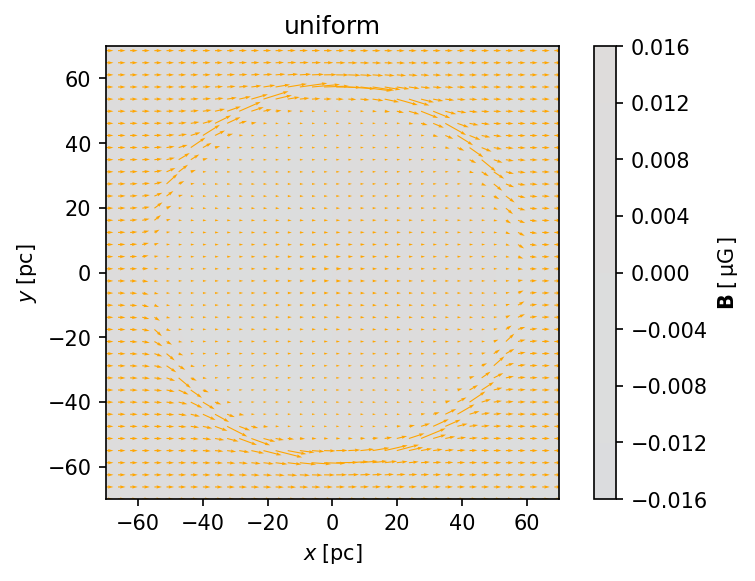

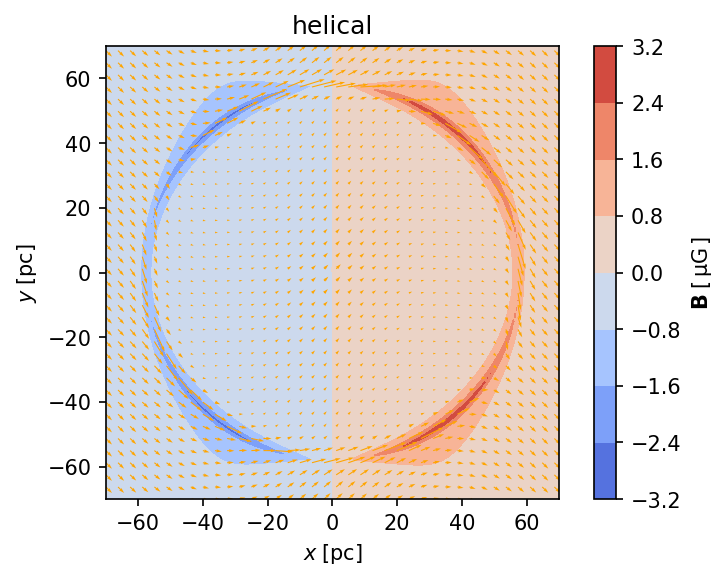

In [39]:
visu.plot_vector_xy(grid, uniform_model.B, show_z_component=True, skip=8)
plt.title('uniform')
visu.plot_vector_xy(grid, helical_model.B, show_z_component=True, skip=8)
plt.title('helical');

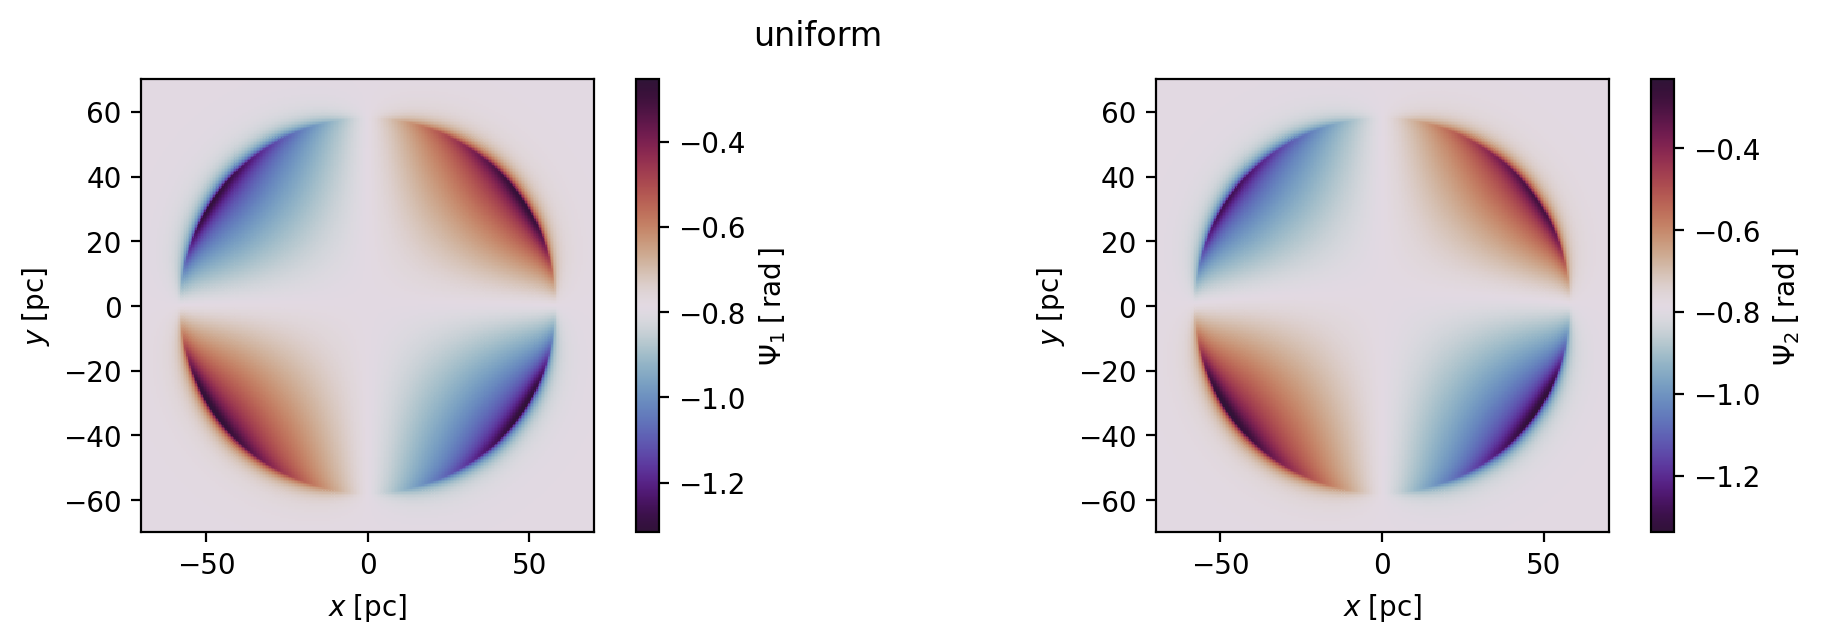

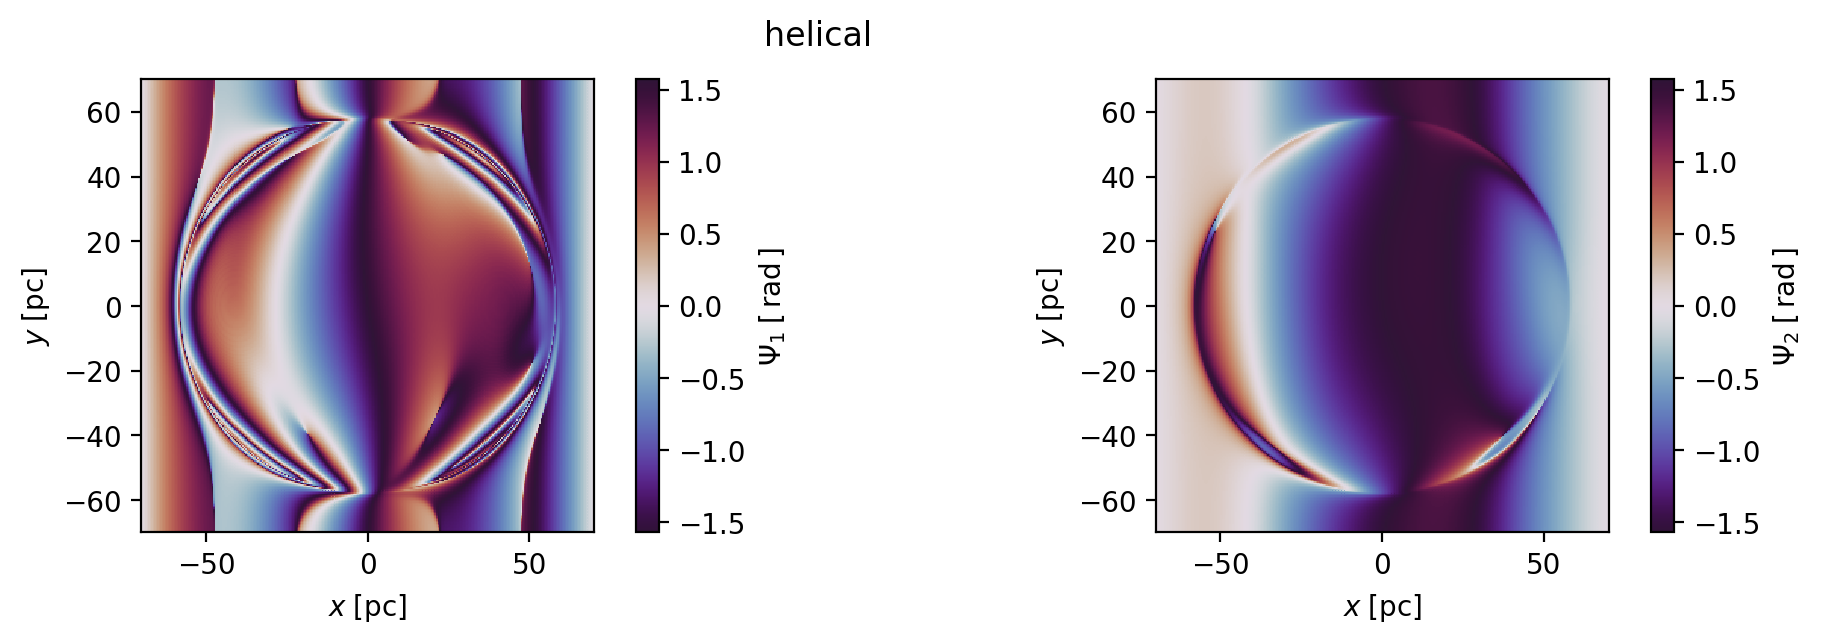

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(12,3),dpi=200)
visu.plot_scalar_xy(grid, uniform_model.Psi[0], name=r'\Psi_1', ax=axs[0])
visu.plot_scalar_xy(grid, uniform_model.Psi[1], name=r'\Psi_2', ax=axs[1])
plt.suptitle('uniform');

fig, axs = plt.subplots(1, 2, figsize=(12,3),dpi=200)
visu.plot_scalar_xy(grid, helical_model.Psi[0], name=r'\Psi_1', ax=axs[0])
visu.plot_scalar_xy(grid, helical_model.Psi[1], name=r'\Psi_2', ax=axs[1])
plt.suptitle('helical');

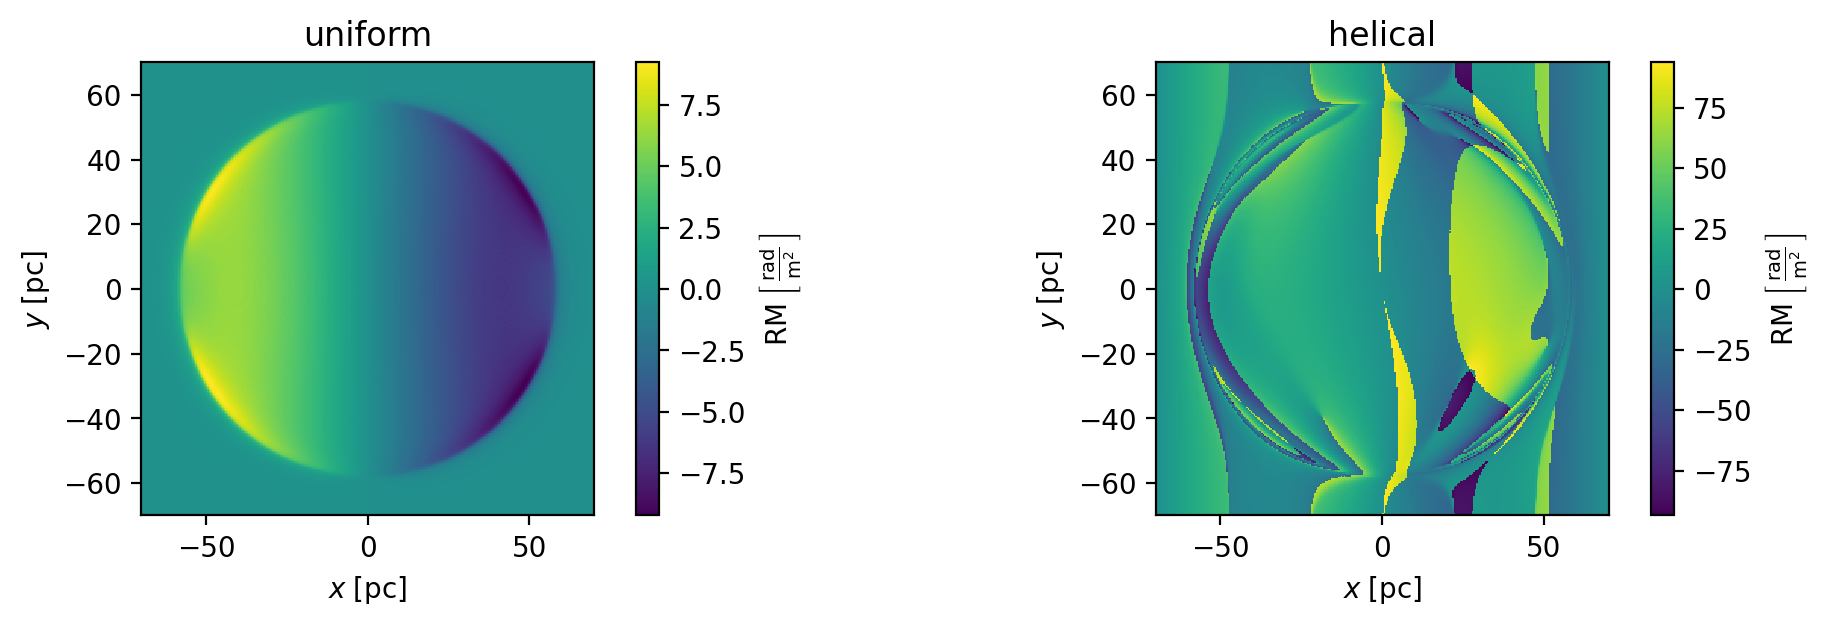

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(12,3),dpi=200)
visu.plot_scalar_xy(grid, uniform_model.RM[0], name=r'\rm RM', ax=axs[0])
axs[0].set_title('uniform')
visu.plot_scalar_xy(grid, helical_model.RM[0], name=r'\rm RM', ax=axs[1])
axs[1].set_title('helical');

Text(0.5, 1.0, 'helical')

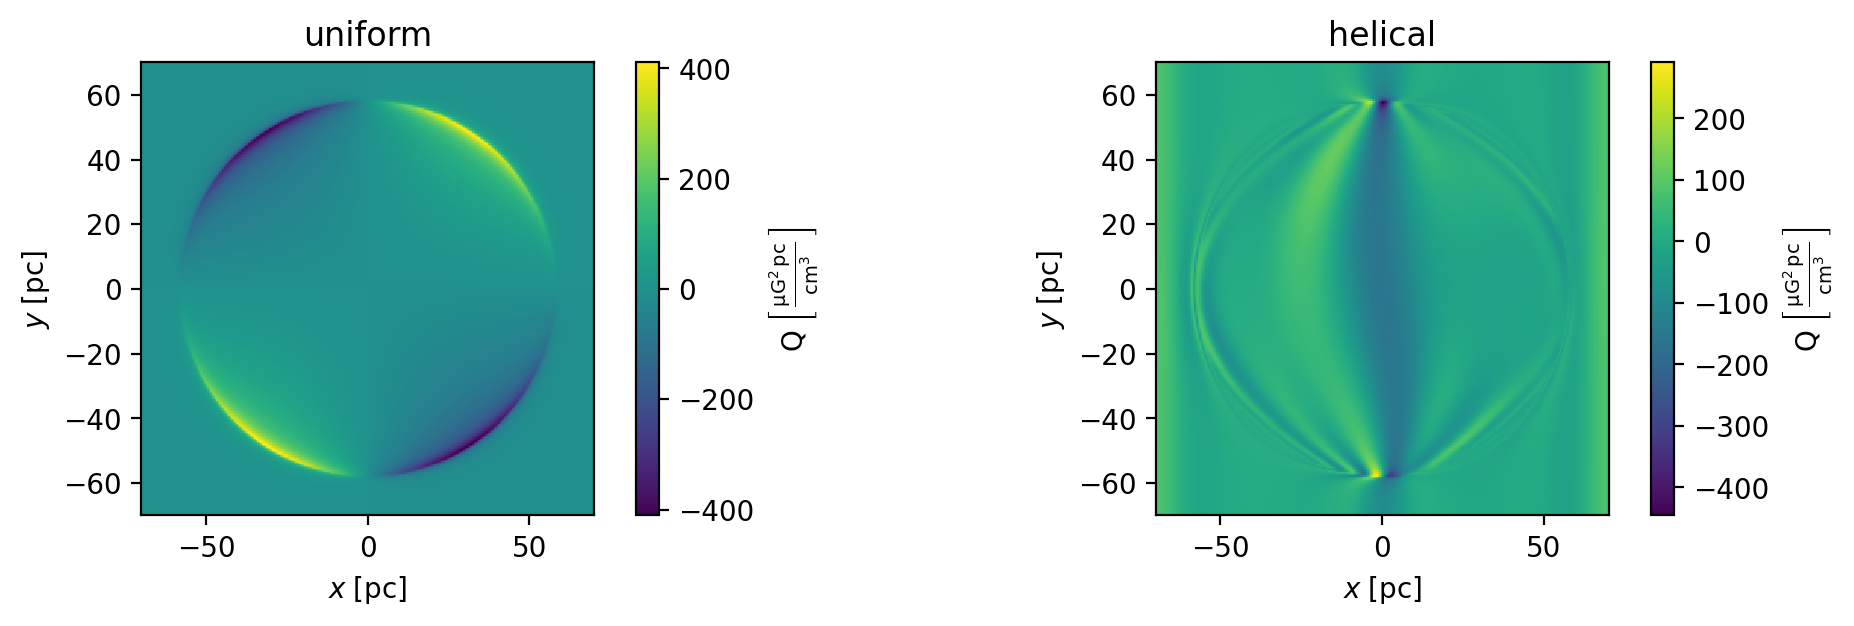

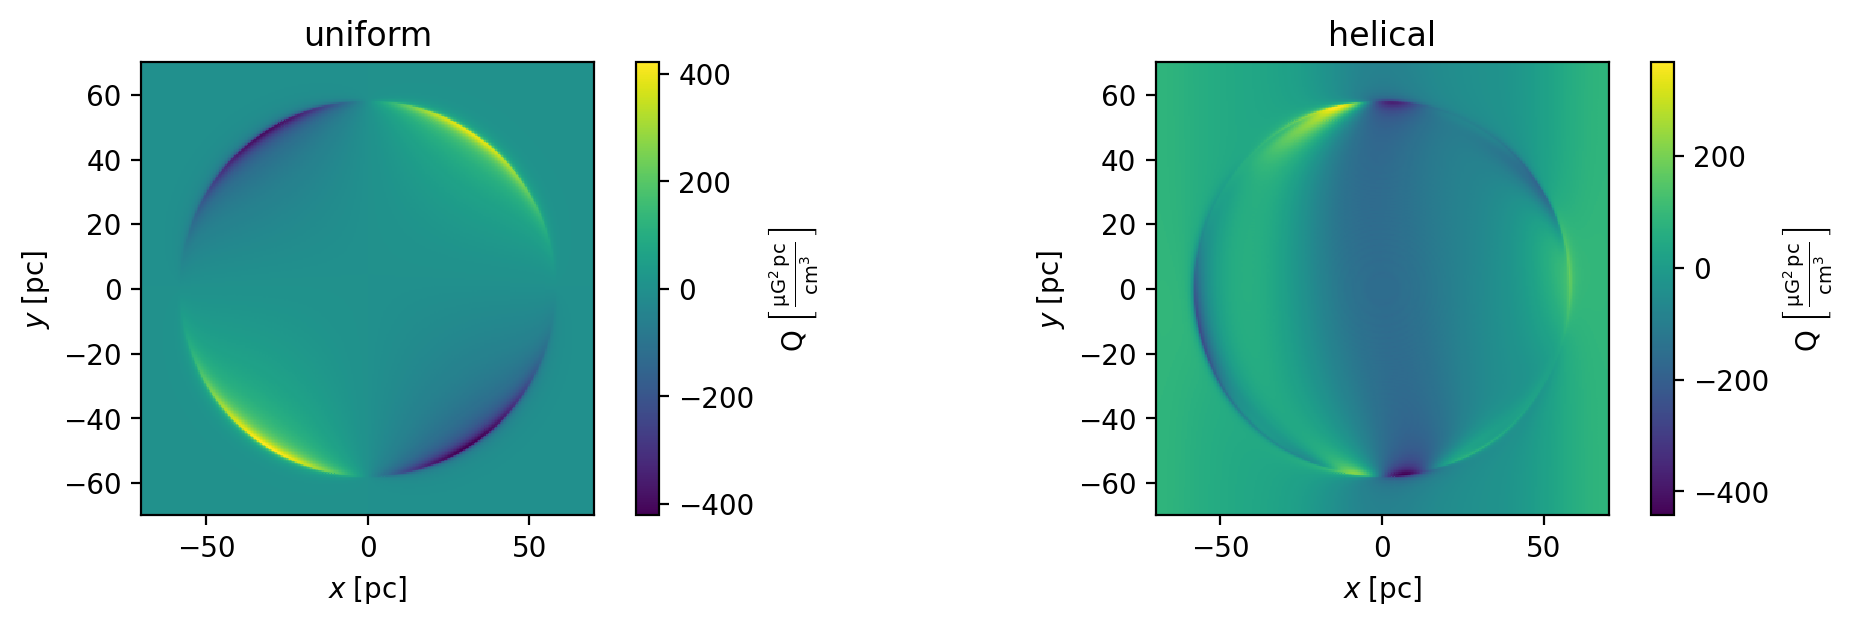

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12,3),dpi=200)
visu.plot_scalar_xy(grid, uniform_model.Q[0], name=r'\rm Q', ax=axs[0]);
axs[0].set_title('uniform')
visu.plot_scalar_xy(grid, helical_model.Q[0], name=r'\rm Q', ax=axs[1]);
axs[1].set_title('helical')
fig, axs = plt.subplots(1, 2, figsize=(12,3),dpi=200)
visu.plot_scalar_xy(grid, uniform_model.Q[1], name=r'\rm Q', ax=axs[0]);
axs[0].set_title('uniform')
visu.plot_scalar_xy(grid, helical_model.Q[1], name=r'\rm Q', ax=axs[1]);
axs[1].set_title('helical')

(300,)
(300,)


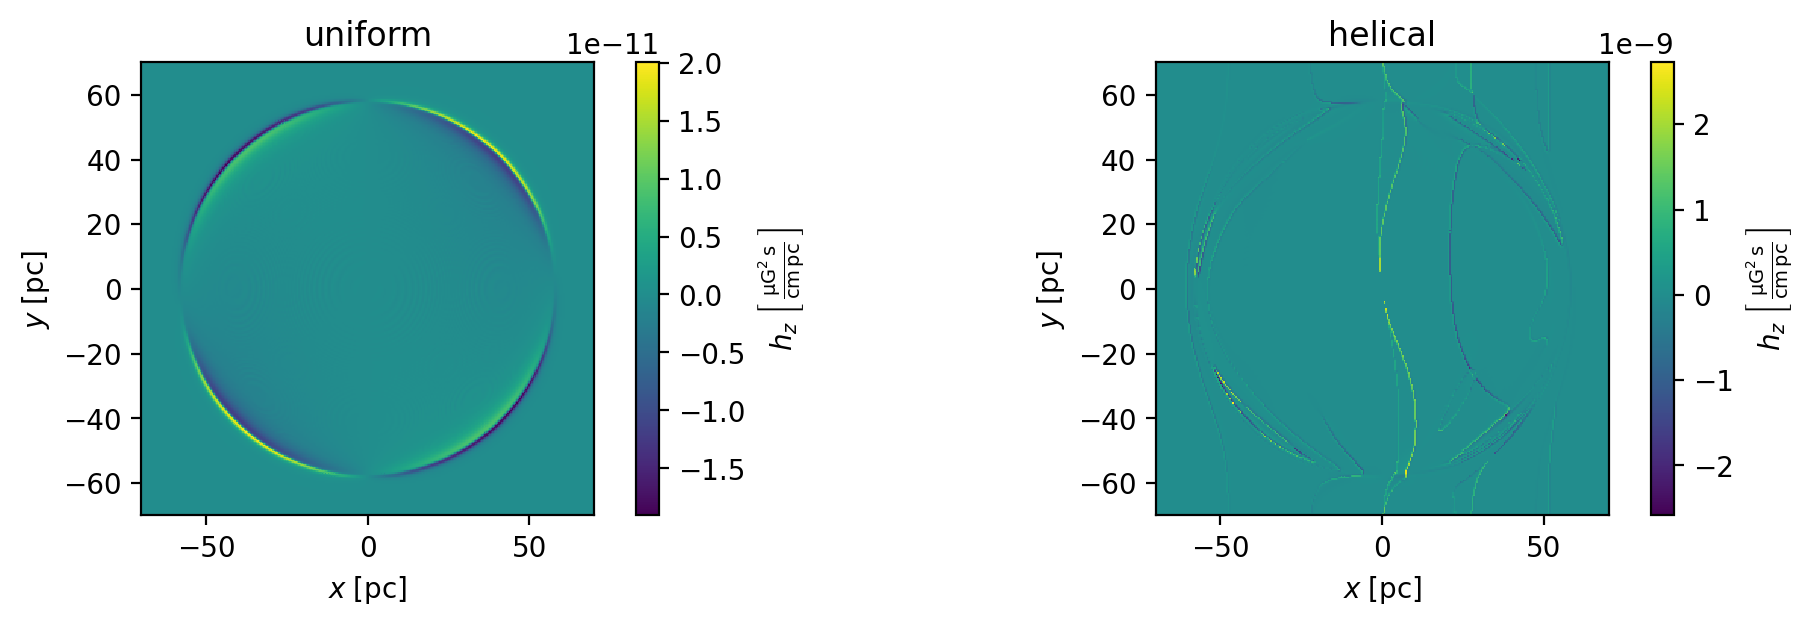

In [43]:
from importlib import reload
import shell
import shell.helicity as hel
import shell.visualization
reload(shell.helicity)
reload(shell.visualization)

fig, axs = plt.subplots(1, 2, figsize=(12,3),dpi=200)

for i, (model, name) in enumerate(zip((uniform_model, helical_model),
                                      ('uniform','helical'))):
    # Radius of the remnant/box
    Lz = (model.grid.box[2][1]-model.grid.box[2][0])/2
    
    ncr_mean = np.mean(model.ncr, axis=2)
    ne_mean = np.mean(model.ne, axis=2)
    
    Hz, Jz = hel.average_helicity(RM=model.RM[0], I=model.I, PA=model.Psi,
                                  wavelengths=model.wavelengths,
                                  ne=1*u.cm**-3, ncr=1*u.cm**-3, L=Lz,
                                  x=model.grid.x[:,0,0], y=model.grid.y[0,:,0],
                                  boundary_radius=1, output_current=True)
    visu.plot_scalar_xy(grid, Hz, name='h_z', ax=axs[i]);
    axs[i].set_title(name)